## Topic Modeling 

### Topic Modeling : 문서 집합에 숨어 있는 주제를 찾아 내는 것. 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현 할 수 있는 중심 단어를 함축적으로 추출. 머신러닝 기반 토픽 모델링에 자주 사용되는 기법은 LSA, NMF, LDA 입니다.  
- 토픽 모델링에서는 주요 토픽의 분포도와 개별 토픽이 어떤의 의미인지, 단어들의 분포를 제공하고 있다. 
- 단어 분포나 구성을 보고 분석가가 주제를 유추 할 수 있다
- 토픽모델링의 단점으로는 초기화 파라미터나 Documnet Term 행렬의 단어 필터링 최적화가 어렵고 사람의 주관적인 해석이 들어가는 것이 단점.
- 토픽 모델리의 가정은, 개별문서는 여러개의 혼합된 주제로 구성되어 있고 개별주제는 다시 여러 개의 단어로 구성되어 있다 

In [7]:
!pip install IPython 
from IPython.display import Image 

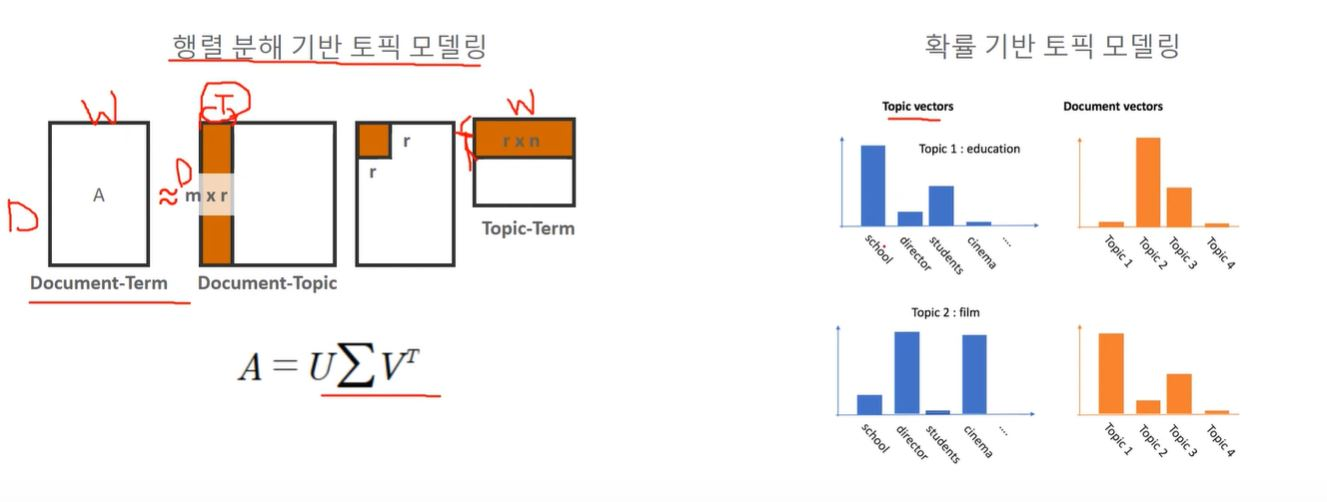

In [14]:
Image('./토픽모델링1.jpg')

## LDA (Latent Dirichlet Allocation)

- 관찰 된 문서 내 단어들을 이용하여 "베이즈 추론"을 통해 잠재된 문서 내 토픽 분포와 토픽 별 단어를 추출.
- LDA 베이스 추론에서 사전확률분포로 사용 되는 것이 디리클래 분포 (Dirichlet) 
- 디리클레 분포는 예를들어 로또를 100번 사서 1등~5등까지 몇번씩 나왔는지 즉, Topic의 분포 Document의 분포를 Update하는 방식. Update할때 사용되는 것이 사후확률! 
- 사이킷런은 LDA 기반 토픽 모델링을 LatentDirichletAllocation 클래스를 제공

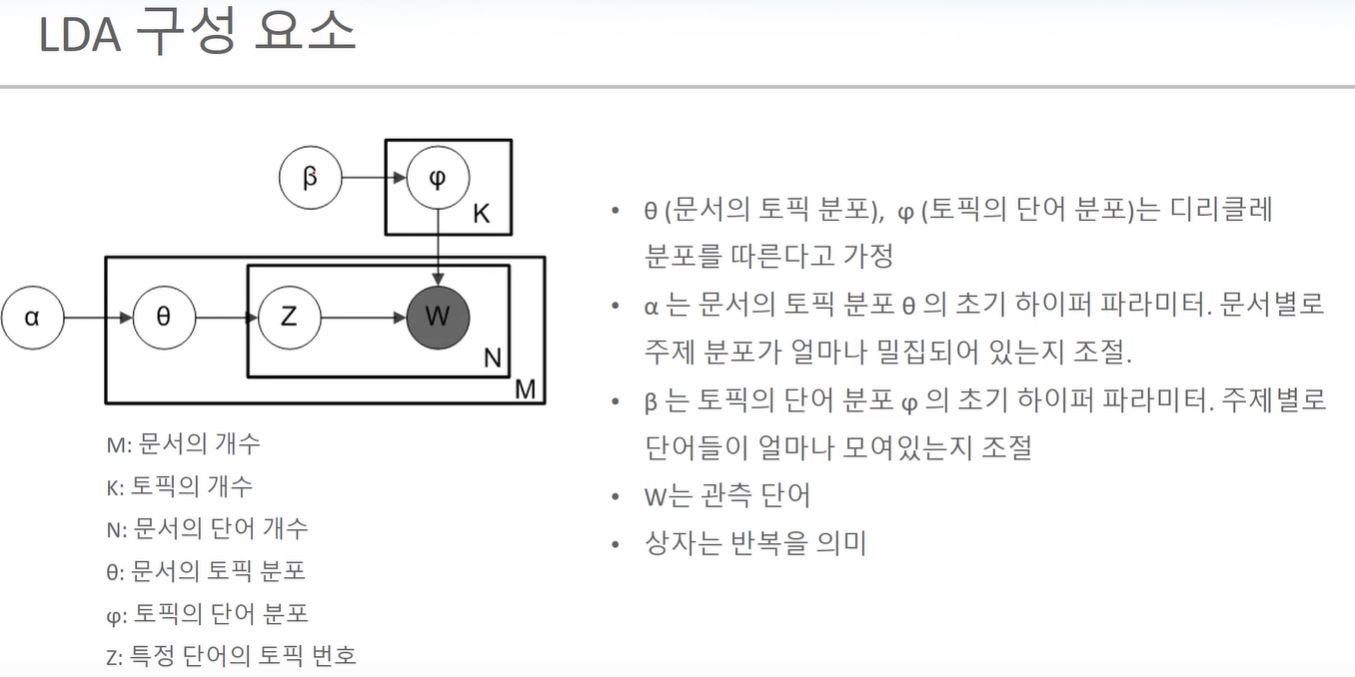

In [15]:
Image('./토픽모델링2.jpg')

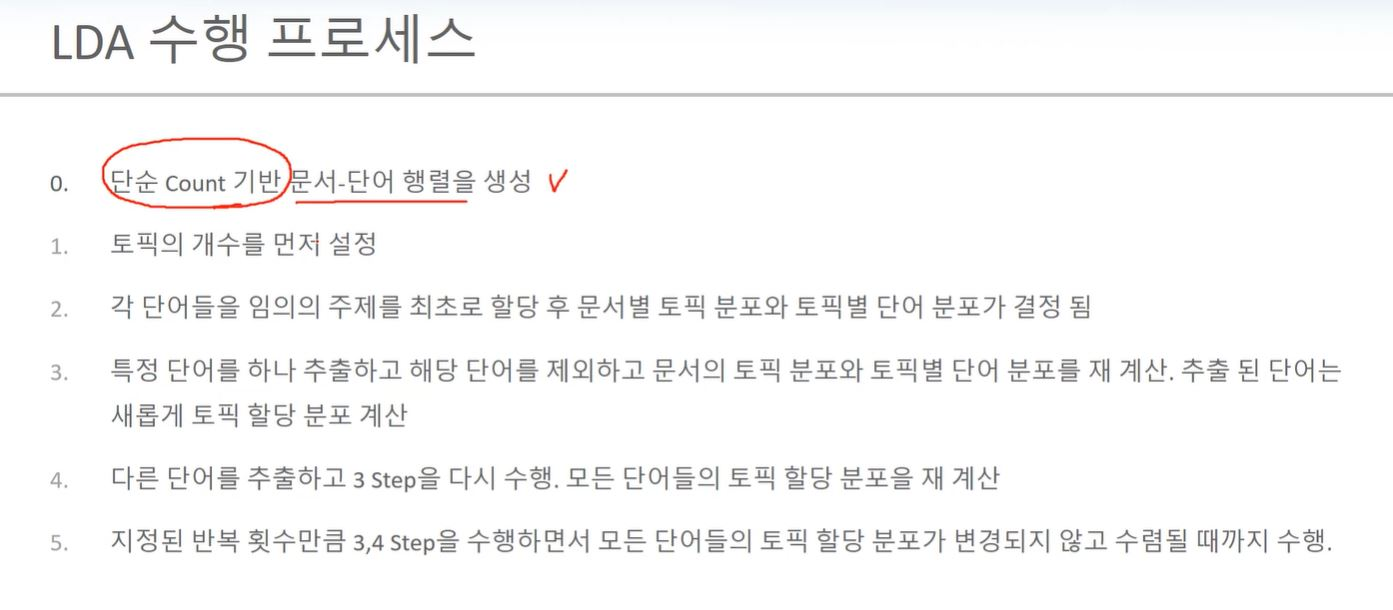

In [16]:
Image('./토픽모델링3.jpg')

### 20 Newsgroup 토픽 모델링

**20개 중 8개의 주제 데이터 로드 및 Count기반 피처 벡터화.**
**LDA는 Count기반 Vectorizer만 적용합니다**

In [21]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
### LDA 클래스 
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 등 8개 주제를 추출. 
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med'  ]

# 위에서 cats 변수로 기재된 category만 추출. featch_20newsgroups( )의 categories에 cats 입력
news_df= fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'), 
                            categories=cats, random_state=0)

In [24]:
news_df.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [25]:
news_df.data

['I appreciate if anyone can point out some good books about the dead sea\nscrolls of Qumran. Thanks in advance.',
 'hi all, i got several emails and a couple news replies and i guess i\nshoulda went into more detail... Being my anxiety level is peaking and you\nfolks have no clue who I am I may as well post the specifics and see what\nyou people think regarding my previous post.\nTo recap i applied to 20 schools total, 16 of which were MD and 4 DO.\n\nas it stands now i have had 13 rejects, 4 interviews( 2 MD and 2 DO), the\nresults of which are 2 waiting lists (1 MD and one DO)\n\n3 schools i heard nothing from at all.\n\nI have contacted all institutions other than the rejects and they have no\ninfo whatsoever to tell me.\n\nI have taken a good mix to apply to.. 2-3 top schools a bunch of middles\nand a few "safety"  (funny that most of my safety schools were the first\nto reject me)\n\nmy index is at like a 3.5 mcats were R7 P9 B10 WQ and R7 P9 B11 WR\nI couldnt get the damn readin

In [26]:
#LDA 는 Count기반의 Vectorizer만 적용합니다.  
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [27]:
feat_vect

<7862x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 207349 stored elements in Compressed Sparse Row format>

**LDA 객체 생성 후 Count 피처 벡터화 객체로 LDA수행**
- hyperparameter 
- n_components : 토픽의 갯수
- α : 문서의 토픽 분포, θ초기 하이퍼 파라미터 
- β : 토픽의 단어 분포, φ초기 하이퍼 파라미터 

In [28]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=8, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

**각 토픽 모델링 주제별 단어들의 연관도 확인**  
lda객체의 components_ 속성은 주제별로 개별 단어들의 연관도 정규화 숫자가 들어있음

shape는 주제 개수(행) X 피처 단어 개수 (열)

components_ 에 들어 있는 숫자값은 각 주제별로 단어가 나타난 횟수를 **정규화** 하여 나타냄.   

숫자가 클 수록 토픽에서 단어가 차지하는 비중이 높음  

In [29]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

**각 토픽별 중심 단어 확인**

In [31]:
def display_topic_words(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('\nTopic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        ### argsort - feature name을 가져오기 위해 위치를 반환해주는 함수 사용
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' + '.join([str(feature_names[i])+'*'+str(round(topic[i],1)) for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topic_words(lda, feature_names, 15)

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 등 8개 주제를 추출. 


Topic # 0
year*703.2 + 10*563.6 + game*476.3 + medical*413.2 + health*377.4 + team*346.8 + 12*343.9 + 20*340.9 + disease*332.1 + cancer*319.9 + 1993*318.3 + games*317.0 + years*306.5 + patients*299.8 + good*286.3

Topic # 1
don*1454.3 + just*1392.8 + like*1190.8 + know*1178.1 + people*836.9 + said*802.5 + think*799.7 + time*754.2 + ve*676.3 + didn*675.9 + right*636.3 + going*625.4 + say*620.7 + ll*583.9 + way*570.3

Topic # 2
image*1047.7 + file*999.1 + jpeg*799.1 + program*495.6 + gif*466.0 + images*443.7 + output*442.3 + format*442.3 + files*438.5 + color*406.3 + entry*387.6 + 00*334.8 + use*308.5 + bit*308.4 + 03*258.7

Topic # 3
like*620.7 + know*591.7 + don*543.7 + think*528.4 + use*514.3 + does*510.2 + just*509.1 + good*425.8 + time*417.4 + book*410.7 + read*402.9 + information*395.2 + people*393.5 + used*388.2 + post*368.4

Topic # 4
armenian*960.6 + israel*815.9 + armenians*699.7 + jews*690.9 + turkish*686.1 + people*653.0 + israeli*476.1 + jewish*467.0 + government*464.4 + wa

**개별 문서별 토픽 분포 확인**

lda객체의 transform()을 수행하면 개별 문서별 토픽 분포를 반환함. 

In [32]:
doc_topics = lda.transform(feat_vect)
print(doc_topics.shape)
print(doc_topics[:3])

# 행 : 먼서의 갯수  열 : Topic 

(7862, 8)
[[0.01389701 0.01394362 0.01389104 0.48221844 0.01397882 0.01389205
  0.01393501 0.43424401]
 [0.27750436 0.18151826 0.0021208  0.53037189 0.00212129 0.00212102
  0.00212113 0.00212125]
 [0.00544459 0.22166575 0.00544539 0.00544528 0.00544039 0.00544168
  0.00544182 0.74567512]]


**개별 문서별 토픽 분포도를 출력**

20newsgroup으로 만들어진 문서명을 출력.

fetch_20newsgroups()으로 만들어진 데이터의 filename속성은 모든 문서의 문서명을 가지고 있음.

filename속성은 절대 디렉토리를 가지는 문서명을 가지고 있으므로 '\\'로 분할하여 맨 마지막 두번째 부터 파일명으로 가져옴

In [33]:
def get_filename_list(newsdata):
    filename_list=[]

    for file in newsdata.filenames:
            #print(file)
            filename_temp = file.split('\\')[-2:]
            filename = '.'.join(filename_temp)
            filename_list.append(filename)
    
    return filename_list

filename_list = get_filename_list(news_df)
print("filename 개수:",len(filename_list), "filename list 10개만:",filename_list[:10])

filename 개수: 7862 filename list 10개만: ['soc.religion.christian.20630', 'sci.med.59422', 'comp.graphics.38765', 'comp.graphics.38810', 'sci.med.59449', 'comp.graphics.38461', 'comp.windows.x.66959', 'rec.motorcycles.104487', 'sci.electronics.53875', 'sci.electronics.53617']


In [37]:
filename_list[:20]

['soc.religion.christian.20630',
 'sci.med.59422',
 'comp.graphics.38765',
 'comp.graphics.38810',
 'sci.med.59449',
 'comp.graphics.38461',
 'comp.windows.x.66959',
 'rec.motorcycles.104487',
 'sci.electronics.53875',
 'sci.electronics.53617',
 'sci.electronics.54089',
 'rec.sport.baseball.102713',
 'rec.sport.baseball.104711',
 'comp.graphics.38232',
 'sci.electronics.52732',
 'talk.politics.mideast.76440',
 'sci.med.59243',
 'talk.politics.mideast.75888',
 'soc.religion.christian.21526',
 'comp.windows.x.66408']

In [36]:
news_df.filenames

array(['C:\\Users\\USER\\scikit_learn_data\\20news_home\\20news-bydate-train\\soc.religion.christian\\20630',
       'C:\\Users\\USER\\scikit_learn_data\\20news_home\\20news-bydate-test\\sci.med\\59422',
       'C:\\Users\\USER\\scikit_learn_data\\20news_home\\20news-bydate-test\\comp.graphics\\38765',
       ...,
       'C:\\Users\\USER\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.sport.baseball\\102656',
       'C:\\Users\\USER\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.electronics\\53606',
       'C:\\Users\\USER\\scikit_learn_data\\20news_home\\20news-bydate-train\\talk.politics.mideast\\76505'],
      dtype='<U94')

**DataFrame으로 생성하여 문서별 토픽 분포도 확인**

In [38]:
import pandas as pd 

topic_names = ['Topic #'+ str(i) for i in range(0, 8)]
doc_topic_df = pd.DataFrame(data=doc_topics, columns=topic_names, index=filename_list)
doc_topic_df.head(20)

,Topic #0,Topic #1,Topic #2,Topic #3,Topic #4,Topic #5,Topic #6,Topic #7
soc.religion.christian.20630,0.013897,0.013944,0.013891,0.482218,0.013979,0.013892,0.013935,0.434244
sci.med.59422,0.277504,0.181518,0.002121,0.530372,0.002121,0.002121,0.002121,0.002121
comp.graphics.38765,0.005445,0.221666,0.005445,0.005445,0.005440,0.005442,0.005442,0.745675
comp.graphics.38810,0.005439,0.005441,0.005449,0.578959,0.005440,0.388387,0.005442,0.005442
sci.med.59449,0.006584,0.552000,0.006587,0.408485,0.006585,0.006585,0.006588,0.006585
comp.graphics.38461,0.008342,0.008352,0.182622,0.767314,0.008335,0.008341,0.008343,0.008351
comp.windows.x.66959,0.372861,0.041667,0.377020,0.041668,0.041703,0.041703,0.041667,0.041711
rec.motorcycles.104487,0.225351,0.674669,0.004814,0.075920,0.004812,0.004812,0.004812,0.004810
sci.electronics.53875,0.008944,0.836686,0.008932,0.008941,0.008935,0.109691,0.008932,0.008938
sci.electronics.53617,0.041733,0.041720,0.708081,0.041742,0.041671,0.041669,0.041699,0.041686


In [39]:
print(doc_topics[:3])

[[0.01389701 0.01394362 0.01389104 0.48221844 0.01397882 0.01389205
  0.01393501 0.43424401]
 [0.27750436 0.18151826 0.0021208  0.53037189 0.00212129 0.00212102
  0.00212113 0.00212125]
 [0.00544459 0.22166575 0.00544539 0.00544528 0.00544039 0.00544168
  0.00544182 0.74567512]]
